# Title: Add title here
*2023 datathon and conference on Efficient Data Analysis for the Condition Assessment of Bridges*

**Author(s):** Add author name here

**Affiliation(s):** Add author affiliation here



## Abstract
Write abstract here.

## Content
Write the main body of Notebook text below this point.

### Headings and subheadings
To break your document into sections use "##" for section headings and "###" for section subheadings. 

To write *italic* text, enclose the text in "\*". 

To write **bold** text, enclose the text in "\*\*".

### Bullet points and numbered lists

- This is an example of a bullet point.
- This is another example of a bullet point.
    - This is an example of a subpoint

1. This is an example of a numbered list.
1. This continues the numbered list.
    1. This is an example of a nested list.
    1. This is a further subpoint.

### Including equations in Jupyter Notebooks
Notebooks use *LaTex* text formatting. Equations can be written inline, such as $e=mc^2$, or as seperate equation blocks as shown below.

$y = Ax+C$


### Including hyperlinks in Jupyter Notebooks
We can include hyperlinks through combinations of square and rounded brackets like [this](https://blogs.ed.ac.uk/edacab/).

### Including tables in Jupyter Notebooks
Tables use the notation shown below:

| Column 1 | Column 2 | Column 3 |
| --- | --- | --- |
| Value 1 | Description 1  | A note |
| Value 2 | Description 2  | A much longer note to demonstrate how columns expand as needed |
| Value 3 | Description 3  | A third note.|
| Value 4 | Description 4  | A further note |

### Including images in Jupyter Notebooks

To include images we upload them to the notebook and reference them using the HTML code shown below.

<div><center>
    <img src="./Example_Image.JPG" width="25%"/>
</center></div>

### Further help
For further guidance on writing Jupter Notebooks refer to [this guide](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) or [this summary](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet).

## Adding Python code to Jupyter Notebooks
To add Python code to Jupyter notebooks we define a new *code block*. This block behaves like a typical Python interpreter, allowing us to import Python libraries, write function, or define variables. An example block of code is shown below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def example_function(input_data):
    output_data = input_data**2
    return output_data

dat = np.arange(100)
output_dat = example_function(dat)
print('The first ten output values are: '+str(output_dat[:10]))

The first ten output values are: [ 0  1  4  9 16 25 36 49 64 81]


Any variables or functions we have previously defined in carry over to future code blocks, as shown below.

In [2]:
print('The first ten output values are still: '+str(output_dat[:10]))

The first ten output values are still: [ 0  1  4  9 16 25 36 49 64 81]


We can plot figures inline to help demonstrate relationships between variables.

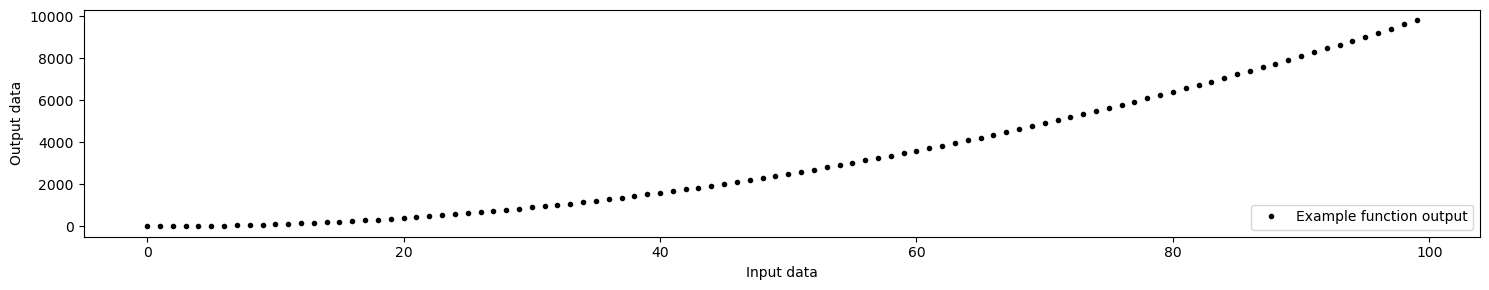

In [3]:
fg,ax = plt.subplots(figsize=(15,3))
ax.plot(dat,output_dat,'k.',label='Example function output')
ax.set_ylabel('Output data')
ax.set_xlabel('Input data')
ax.legend(loc=4)
fg.tight_layout()

## Accessing the shaker table transfer function data

The transfer function data for each test condition (damage state) is stored as a CSV file.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/TF_working_condition_01.csv"

dat0 = pd.read_csv(url,index_col=0)

### Transfer function data structure
The data file is structured with the index column as the frequency, and with all other data stored as columns of the dataframe. The names of the index column and dataframe columns are printed below.

In [5]:
print(dat0.index.name)
print(dat0.columns)

Frequency [Hz]
Index(['A2', 'AY1', 'AY2', 'AY3', 'AY5', 'AY6', 'AY7', 'R1', 'R2', 'AZ2',
       'AZ4', 'AZ5', 'AZ6', 'AZ7', 'E11', 'E12', 'E13', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10'],
      dtype='object')


### Plotting the transfer function data
The block of code below plots the magnitude of the frequency transfer function for accelerometer ‘AZ2’ for test condition 01.

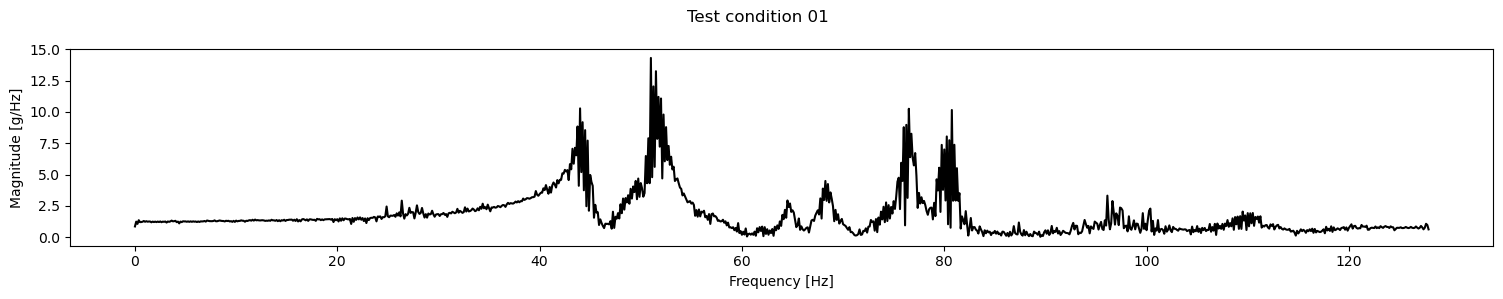

In [6]:
fg,ax = plt.subplots(figsize=(15,3))
ax.plot(dat0.index,dat0['AZ2'],'k')
ax.set_ylabel('Magnitude [g/Hz]')
ax.set_xlabel('Frequency [Hz]')
fg.suptitle('Test condition 01')
fg.tight_layout()

## Comparing transfer functions from the damaged and undamaged structure

The block of code below compares the frequency transfer function of accelerometer ‘AZ2’ for test conditions 01 and 16, highlighting how the dynamic behaviour of the structure has changed due to the damage. We can see in the plot that the frequency at which peaks occur has decreased, likely due to a reduction in the stiffness of the frame due to cracking. Alongside this the peaks are broader and have lower magnitudes, likely due to increased damping of the structure due to friction occuring at the cracks.

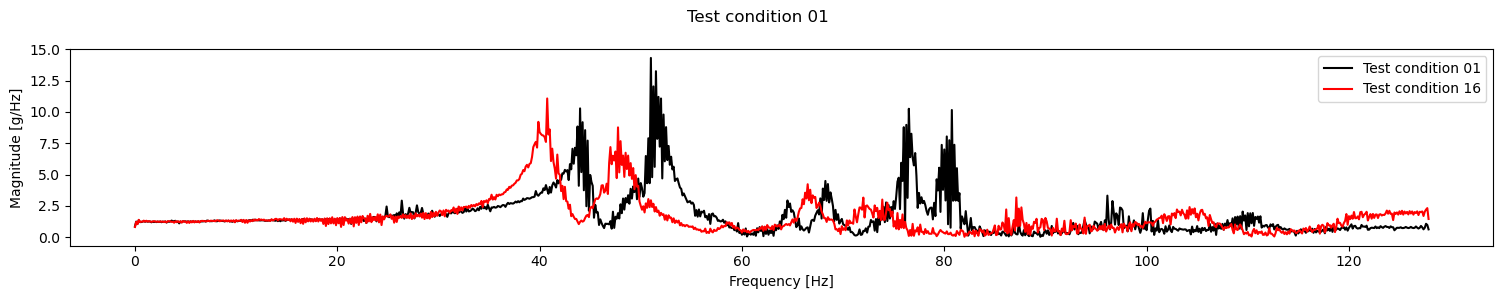

In [7]:
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/TF_working_condition_16.csv"

dat16 = pd.read_csv(url,index_col=0)

fg,ax = plt.subplots(figsize=(15,3))

ax.plot(dat0.index,dat0['AZ2'],'k',label='Test condition 01')
ax.plot(dat16.index,dat16['AZ2'],'r',label='Test condition 16')
ax.set_ylabel('Magnitude [g/Hz]')
ax.set_xlabel('Frequency [Hz]')
ax.legend(loc=1)
fg.suptitle('Test condition 01')
fg.tight_layout()

## Accessing acceleration data from the damaged structure
The data for each working condition (magnitude of earthquake excitation) is stored as a CSV file. The code below loads and formats the data for working condition e1.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import welch

url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/Shaker_table_data_working_condition_e1.csv"
dat0 = pd.read_csv(url,index_col=0)

### Acceleration data structure

The data file is structured with the index column as the sample time, and with all other data stored as columns of the dataframe. The names of the index column and dataframe columns are printed below.

In [9]:
print(dat0.index.name)
print(dat0.columns)

Time [s]
Index(['Input force', 'A10', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'AY1', 'AY2', 'AY3', 'AY4', 'AY5', 'AY6', 'AY7', 'AZ2', 'AZ3',
       'AZ4', 'AZ5', 'AZ6', 'AZ7', 'R1', 'R2'],
      dtype='object')


### Plotting the shaker table data acceleration data

The block of code below plots all the Z direction measuring point responses for working condition *e1*, alongside their 10-second Welch averaged power spectral density.

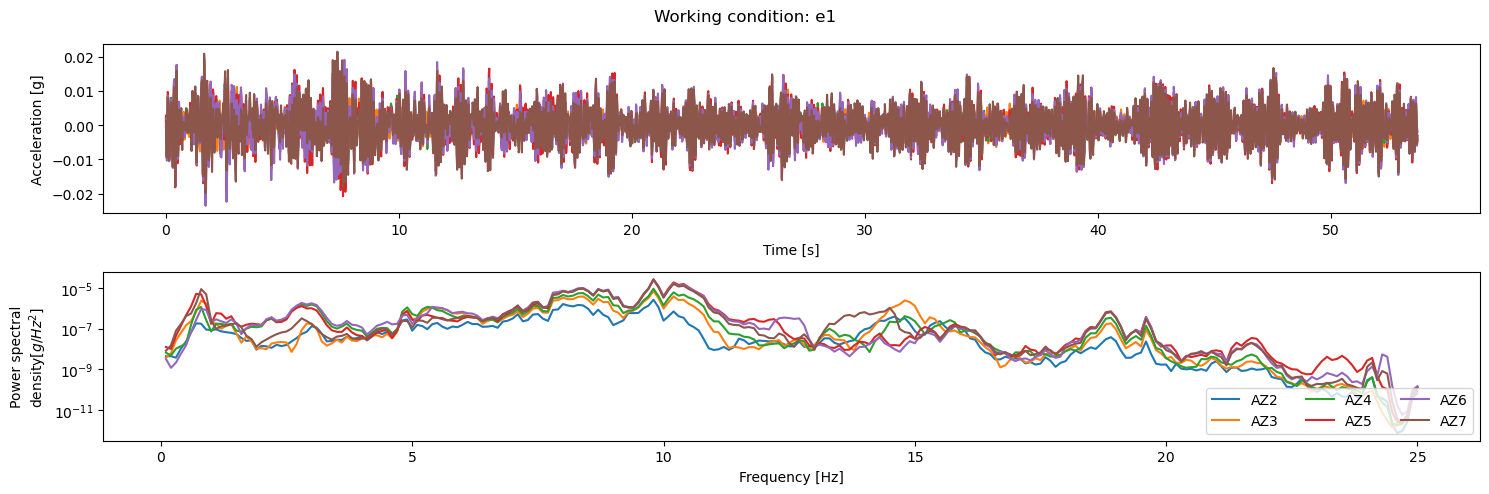

In [10]:
fs = 50 # Sample rate of data
fg,ax = plt.subplots(2,figsize=(15,5))
for channel in dat0.columns[1:]:
    if "Z" in channel:
        f,psd = welch(dat0[channel],fs=fs,nperseg=fs*10)
        ax[0].plot(dat0.index,dat0[channel],label=channel)
        ax[1].semilogy(f[1:],psd[1:],label=channel)
ax[0].set_ylabel('Acceleration [g]')
ax[1].set_ylabel('Power spectral\ndensity[$g/Hz^2$]')
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].legend(loc=4,ncol=3)
fg.suptitle('Working condition: e1')
fg.tight_layout()

### Loading and plotting the input excitation

The input excitation, also sampled at 50Hz, from the El Centro wave is also stored within the dataframe.

The block of code below plots the input excitation for working condition *e1* against time.

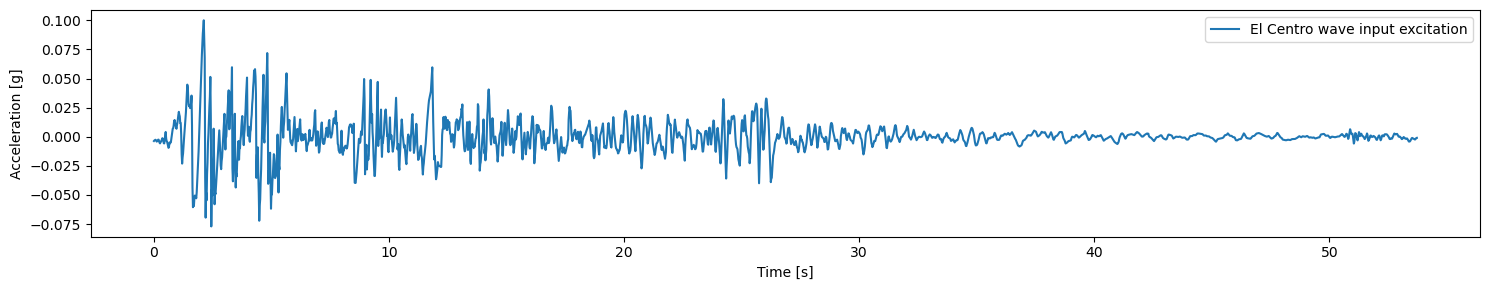

In [11]:
fg,ax = plt.subplots(figsize=(15,3))
ax.plot(dat0.index,dat0['Input force'],label='El Centro wave input excitation')
ax.set_ylabel('Acceleration [g]')
ax.set_xlabel('Time [s]')
ax.legend(loc=1)
fg.tight_layout()

The block of code below compares the input excitation with the output from accelerometer *A2* for working condition *e1*.

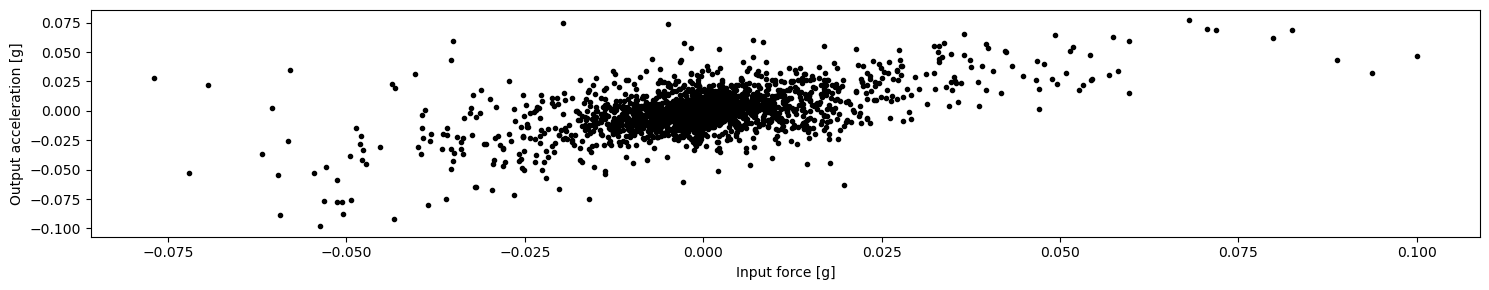

In [12]:
channel = 'A2' # Acceleromter to plot
fg,ax = plt.subplots(figsize=(15,3))
ax.plot(dat0['Input force'],dat0[channel],'k.')
ax.set_ylabel('Output acceleration [g]')
ax.set_xlabel('Input force [g]')
fg.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9df15425-03c5-4773-8629-248ddacc836e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>